# Abstract
Using publicly available genome data, a proof of concept SNP Population Study can be conducted by employing open source web services and the coded programs as outlined in this paper.

# Keywords
Single nucleotide polymorphism (SNP), genetic variation, human genome, 23andme raw SNP data, rsid, The Personal Genome Project, SIFT score, deleterious variants.

# Introduction
Single nucleotide polymorphisms (SNPs) are the most common form of genetic variation among people.  Each SNP represents a variation in the DNA sequence that occurs when a single nucleotide in the sequence is different from the norm of much of the population.  SNPs occur normally throughout a human genome.  It is estimated on average; SNPs occur one per three hundred nucleotides.  In total, there are approximately ten million SNPs in the human genome.  

In most situations, SNPs do not pose a detrimental threat on our development and our health.  But studies have shown they can contribute significantly to how an individual reacts to a drug or responds to a therapy, the risk of a person developing a certain disease, the likelihood of being harmed by an environmental toxin, and many more.

This project is designed to parse through given human genes to identify any potentially harmful SNPs for a given individual.  This computational tool can be used by individuals for personal research.  It can also be used within a pipeline to do population studies of human genomes to explore and aggregate data based on gender, ethnicities, geographic locations, etc. Data generated by this tool can then be used for research and statistical analysis.


# Methods

## SNP Population Study

With access to publicly available genome data, a proof on concept population study can be conducted using the tools outlined in this paper.

## Tools

### find_snp.py

#### Inputs

23andme genome file

Collection of gene symbols

Online API sources

In [ ]:
$ python3 find_snp.py --help
usage: find_snp.py [options] -option1[default] <input >output

Find SNPs for given 23andMe raw data

positional arguments:
  inFile                23ndMe raw data
  outFile               save results to output file

optional arguments:
  -h, --help            show this help message and exit
  -g GENES, --genes GENES
                        genes to query for SNPs
  -v, --version         show program's version number and exit
  --generateCSV         Output results to CSV file
  --color               Output results to standard output using color

#### Design

For each gene of interest, request all gene variants from the 23andme API.  These variants are inserted into an array of rsids.  For each rsid in the array, request SIFT score from myvariant.info API.  The rsids that have a low SIFT score (between 0.0 to 0.05) are classified as deleterious.  The raw 23andme SNP data is checked against the potentially harmful variant.  If such rsid is located within the raw 23andme SNP data, the information will be output into a CSV file.

#### SNP Scoring

SNPs can have scores associated with results from online sources.  The SIFT scoring scale ranges 0 to 1.  Smaller numbers are worse. If a SNP has a score, create a row with rsID, gene, SIFT score and subject traits.  Sort the results and write results to standard output and/or CSV file.

#### Outputs

CSV file of adverse variants by gene and score


# Data Sources

## 23andMe API

23andme provides a list of web services for developers to consume in their applications.  This project makes use of the following 23andme web service:  

https://api.23andme.com/3/marker/?gene_name=nameOfGene
    where nameOfGene is the name of the gene of interest

Example: https://api.23andme.com/3/marker/?gene_name=BRCA1 
When the name of a gene is supplied to this web service, it will return a list of rsids of variants located within the gene returned as a JSON document:


In [ ]:
{
  "data": [
    {
      "id": "rs12023469",
      "alternate_ids": [],
      "gene_names": [
        "LOC100506310",
        "MTHFR"
      ],
      "accession_id": "NC_000001.10",
      "start": 11845945,
      "end": 11845946,
      "variants": [
        {
          "accession_id": "NC_000001.10",
          "start": 11845945,
          "end": 11845946,
          "allele": "C",
          "platform_labels": [
            "ILMN_CUSTOMv4"
          ]
        },
        {
          "accession_id": "NC_000001.10",
          "start": 11845945,
          "end": 11845946,
          "allele": "T",
          "platform_labels": [
            "ILMN_CUSTOMv4"
          ]
        }
      ]
    },
    {
      "id": "rs15854",
      "alternate_ids": [],
      "gene_names": [
        "LOC100506310",
        "MTHFR"
      ],
      "accession_id": "NC_000001.10",
      "start": 11846197,
      "end": 11846198,
      "variants": [
        {
          "accession_id": "NC_000001.10",
          "start": 11846197,
          "end": 11846198,
          "allele": "A",
          "platform_labels": [
            "ILMN_550Qv1_CUSTOMv2",
            "ILMN_550v3_CUSTOMv1",
            "ILMN_CUSTOMv4",
            "ILMN_OMNIEXv3_CUSTOMv3"
          ]
        },
        {
          "accession_id": "NC_000001.10",
          "start": 11846197,
          "end": 11846198,
          "allele": "G",
          "platform_labels": [
            "ILMN_550Qv1_CUSTOMv2",
            "ILMN_550v3_CUSTOMv1",
            "ILMN_CUSTOMv4",
            "ILMN_OMNIEXv3_CUSTOMv3"
          ]
        }
      ]
    }
  ]
}

### Download Raw Genome SNP File

Customers of 23andme can download raw SNP data from their genome as a text file.  Below is a sample of a 23andme text file.  These files will be used to analyze SNP frequencies across populations by traits.


In [ ]:
$ # Sample downloaded 23andMe genome
$ cat genome.txt
This data file generated by 23andMe at: Sun Mar 11 12:23:50 2018
#
# This file contains raw genotype data, including data that is not used in 23andMe reports.
# This data has undergone a general quality review however only a subset of markers have been
# individually validated for accuracy. As such, this data is suitable only for research,
# educational, and informational use and not for medical or other use.
#
# Below is a text version of your data.  Fields are TAB-separated
# Each line corresponds to a single SNP.  For each SNP, we provide its identifier
# (an rsid or an internal id), its location on the reference human genome, and the
# genotype call oriented with respect to the plus strand on the human reference sequence.
# We are using reference human assembly build 37 (also known as Annotation Release 104).
# Note that it is possible that data downloaded at different times may be different due to ongoing
# improvements in our ability to call genotypes. More information about these changes can be found at:
# https://you.23andme.com/p/961b127a3d69fc83/tools/data/download/
#
# More information on reference human assembly build 37 (aka Annotation Release 104):
# http://www.ncbi.nlm.nih.gov/mapview/map_search.cgi?taxid=9606
#
# rsid	chromosome	position	genotype
rs4477212	1	82154	AA
rs3094315	1	752566	AA
rs3131972	1	752721	GG
rs12124819	1	776546	AA
rs11240777	1	798959	AG
rs6681049	1	800007	CC
rs4970383	1	838555	CC
rs4475691	1	846808	CC
rs7537756	1	854250	AA
rs13302982	1	861808	GG

Each row in the table corresponds to a single SNP.  Each SNP is provided with its identifier (rsid), its location on the human genome, and the genotype call with respect to the plus strand on the human reference sequence.

## Personal Genome Project

The Personal Genome Project is a public repository for individuals to voluntarily and publicly share their personal data for medical research and scientific studies.  This project utilizes the 23andme raw SNP data uploaded from multiple participants to The Public Genome Project website: https://my.pgp-hms.org/public_genetic_data?data_type=23andMe (login required).

## myvariant.info

myvariant.info is an open source hub where developers can make use of their query tools to retrieve variant annotation data aggregated from many popular data sources.  Some of these data sources include dbNSTP, Cancer Genome Interpreter, genome Aggregation Database.  This project makes use of the following myvariant.info web services:

http://myvariant.info/v1/query?q=rsid
    where rsid is the identifier of the SNP of interest

Example: http://myvariant.info/v1/query?q=rs8176320

By passing in the rsid of a SNP to this web service, it will return among other things, a SIFT (Sorting Intolerant From Tolerant) score.  A SIFT score predicts the degree of a protein function being affected by an amino acid substitution.  A SIFT score ranges from 0.0 to 1.0.  A variant with a SIFT score between 0.0 and 0.05 is considered to be harmful while a variant with a SIFT score from 0.05 to 1.0 is usually tolerated

## SNPedia

SNPedia was used initially for research and validation of results.  SNPedia's reports are human readable but were not suitable for automation by code.

# Usage

## Personal Genomic Exploration

In [ ]:
$ python3 find_snp.py genome_Annonymous_v3_Full_20180311122349.txt  out.csv --genes=MTHFR,DAO,COMT,MAOA,NOS3,PEMT --color | head -n 15
Namespace(color=True, generateCSV=False, genes='MTHFR,DAO,COMT,MAOA,NOS3,PEMT', inFile='genome_Annonymous_v3_Full_20180311122349.txt', outFile='out.csv')
Relevant SNPs for genome_Annonymous_v3_Full_20180311122349.txt
rs4680 COMT 0.00963
rs58524323 MAOA 0.02749
rs7946 PEMT 0.06789
rs1800466 MAOA 0.18095
rs868014 MTHFR 0.22
rs1803986 MAOA 0.33878
rs1801133 MTHFR 0.72092
rs1799835 MAOA 0.91219
rs4846051 MTHFR 0.91219
rs3918188 NOS3 1
rs2566511 NOS3 1
rs2853795 NOS3 1
rs2853796 NOS3 1

## Population Study Datasets

For each gene of interest, request all gene variants from the 23andme API.  These variants are inserted into an array of rsids.  For each rsid in the array, request SIFT score from myvariant.info API.  The rsids that have a low SIFT score (between 0.0 to 0.05) are classified as deleterious.  The raw 23andme SNP data is checked against the potentially harmful variant.  If such rsid is located within the raw 23andme SNP data, the information will be output into a CSV file.

### Generating Datasets

Download 100 Donated 23andMe genome SNP files to a folder

Run GenerateDatasets.py and provide as input parameters: 23andme directory location of the 100 genome files and results set output file name

GenerateDatasets.py generates a CSV file of the population dataset.

### generate_dateset.py
generate_dataset.py is a python command line utility which uses find_snp.py to identify and report on potentially deleterious variants in multiple raw 23andme SNP data sets for population studies.

#### Inputs
Array of genes of interest
Directory containing raw 23andme SNP files


In [ ]:
$ python3 generate_datasets.py --help
usage: generate_datasets.py [options] -option1[default] <input >output

Generate population datasets from 23andme raw text files

positional arguments:
  inFileDir             23ndMe raw data file directory
  outFile               output file name of CSV dataset containing all results

optional arguments:
  -h, --help            show this help message and exit
  -g GENES, --genes GENES
                        genes to query for SNPs
  -v, --version         show program's version number and exit

#### Design
Read each raw 23andme SNP dataset, apply the algorithm in find_snp.py to identify a list of potentially harmful variants in these genomes

#### Output
CSV file of adverse variants

In [ ]:
$ head sample_results.csv
subject,gene,rsId,score,gender,ethnicity
23andMe-MM.txt,MTHFR,rs868014,0.22,female,"light-skinned, European"
23andMe-MM.txt,MTHFR,rs1801133,0.72092,female,"light-skinned, European"
23andMe-MM.txt,MTHFR,rs4846051,0.91219,female,"light-skinned, European"
23andMe-MM.txt,BRCA1,rs12516,1,female,"light-skinned, European"
23andMe-MM.txt,BRCA1,rs8176318,1,female,"light-skinned, European"
23andMe-MM.txt,BRCA1,rs3092988,1,female,"light-skinned, European"
23andMe-MM.txt,MTHFR,rs4846048,1,female,"light-skinned, European"
23andMe-MM.txt,MTHFR,rs4845884,1,female,"light-skinned, European"
23andMe-MM.txt,MTHFR,rs3737966,1,female,"light-skinned, European"

## Data Exploration

The resulting dataset can be used for data exploration and analysis.

In [9]:
import pandas as pd

samples_df = pd.read_csv('sample_results.csv')

score_counts_by_gene_df = pd.DataFrame(columns=['gene', 'warning', 'caution', 'ok'])

for gene in samples_df['gene'].unique():
    warn = samples_df.loc[(samples_df['gene'] == gene) & samples_df['score'] <= .05].agg(['count'])['score'][0]
    caution = samples_df.loc[(samples_df['gene'] == gene) & (samples_df['score'] > .05) & (samples_df['score'] <= 0.5)].agg(['count'])['score'][0]
    ok = samples_df.loc[(samples_df['gene'] == gene) & (samples_df['score'] > .50) & (samples_df['score'] <= 1.0)].agg(['count'])['score'][0]
    score_counts_by_gene_df = score_counts_by_gene_df.append({'gene': gene, 'warning': warn, 'caution': caution, 'ok': ok}, ignore_index=True)

score_counts_by_gene_df.style

,gene,warning,caution,ok
0,MTHFR,177,121,1273
1,BRCA1,1394,0,177


In [14]:
import pandas as pd

def sum_warn_by(gene):
    return samples_df.loc[(samples_df['gene'] == gene) & samples_df['score'] <= .05].agg(['count'])['score'][0]

def sum_caution_by(gene):
    return samples_df.loc[(samples_df['gene'] == gene) & (samples_df['score'] > .05) & (samples_df['score'] <= 0.5)].agg(['count'])['score'][0]

def sum_ok_by(gene):
    return samples_df.loc[(samples_df['gene'] == gene) & (samples_df['score'] > .50) & (samples_df['score'] <= 1.0)].agg(
        ['count'])['score'][0]

samples_df = pd.read_csv('/Users/ba25714/PycharmProjects/final_project/sample_results.csv')

score_counts_by_gene_df = pd.DataFrame(columns=['gene', 'warning', 'caution', 'ok'])

for gene in samples_df['gene'].unique():
    score_counts_by_gene_df = score_counts_by_gene_df.append({'gene': gene, 'warning': sum_warn_by(gene), 'caution': sum_caution_by(gene), 'ok': sum_ok_by(gene)}, ignore_index=True)

score_counts_by_gene_df.style

TypeError: 'Styler' object is not callable

[<matplotlib.text.Text at 0x1162cd5f8>, <matplotlib.text.Text at 0x1162c3198>]

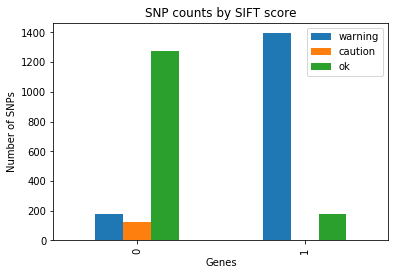

In [20]:
%matplotlib inline
ax = score_counts_by_gene_df.plot(kind="bar", title='SNP counts by SIFT score')
ax.set(xlabel='Genes', ylabel='Number of SNPs')

# References

"API Reference." 23andMe. Np., nd. Web. Accessed March 16, 2018. 
	https://api.23andme.com/docs/reference/. 

"How it Works." 23andMe. N.p., n.d. Web. Accessed March 16, 2018. 
	https://www.23andme.com/howitworks/. 

Ng, P., and Henikoff S. "SIFT: Predicting amino acid changes that affect protein function." 
    Nucleic Acids Research. July 01, 2003. Accessed March 16, 2018. Web. 
    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC168916/.

“SNP.” Nature News, Nature Publishing Group, n.d. Web. Accessed March 16, 2018.
	http://www.nature.com/scitable/definition/single-nucleotide-polymorphism-snp-295. 
    
Chunlei Wu. "A simple resource for over 34 million gene variants." MyVariant.info. Np., nd. Web. Accessed March 16, 2018.
    http://myvariant.info/about/.
